### **Decision tree model**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from pickle import dump
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
from utils import get_classifier_metrics

### **Carga de datos**

In [2]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/processed/eda_db.csv', sep=',')

In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


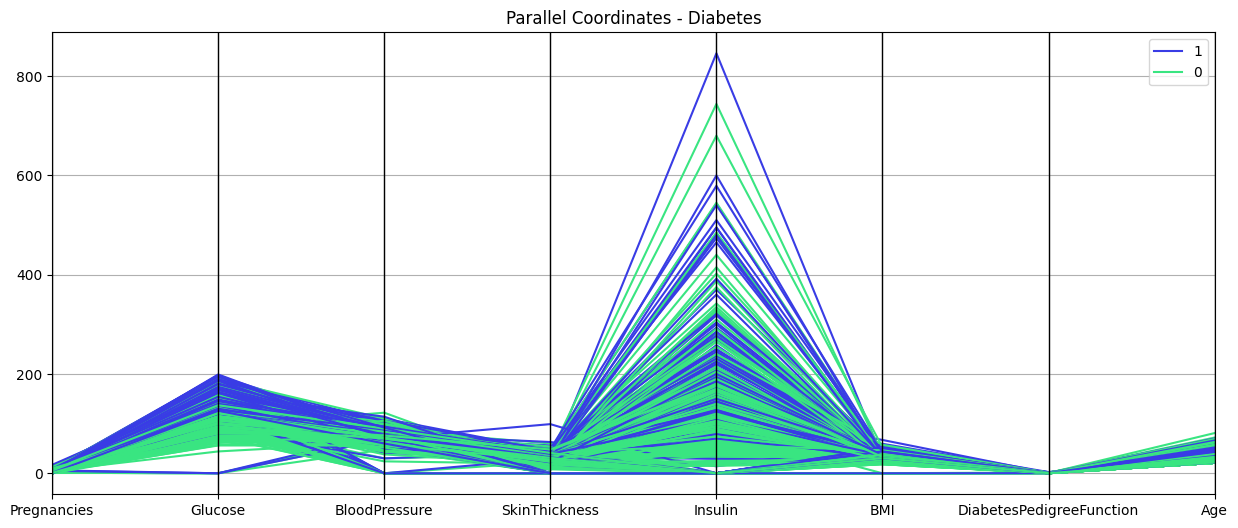

In [4]:
plt.figure(figsize=(15,6))
pd.plotting.parallel_coordinates(df, class_column="Outcome", color=("#393CE5", "#39E581"))
plt.title("Parallel Coordinates - Diabetes")
plt.show()

### **Creaciony entreno de modelo**

In [5]:
# Create the model
model = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### **Prediccion**

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [7]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.7467532467532467

### **Clasificacion por árbol de decision**

In [8]:
#Clasificacion por arbol
dt_classifier_model = DecisionTreeClassifier(random_state=18)
dt_classifier_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


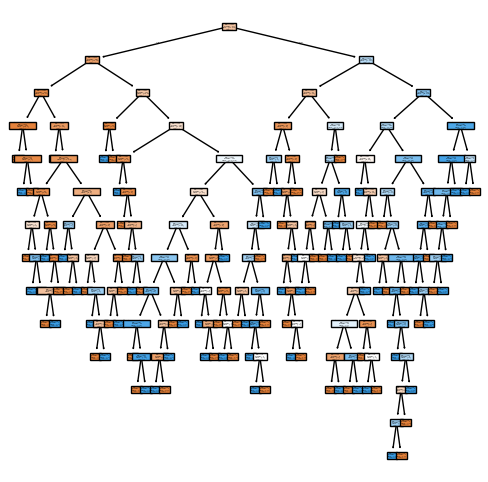

In [9]:
plt.figure(figsize=(6, 6))

tree.plot_tree(dt_classifier_model,
               feature_names=list(X_train.columns),
               class_names=['A', 'B', 'C'],
               filled=True)
plt.show()

In [10]:
y_pred_test = dt_classifier_model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [11]:
y_pred_train = dt_classifier_model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [12]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.772727,0.772727,0.772727,0.772727


In [13]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='macro')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.772727,0.758804,0.754558,0.766667


In [14]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='weighted')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.772727,0.775361,0.781206,0.772727


In [15]:
with open('/workspaces/GuilloMansa-MachineLearning/models/diabetes-decision-tree-classifier.pkl', 'wb') as file:
    pickle.dump(dt_classifier_model, file)

#### **Observation:**  The decision tree model achieved 74.6% accuracy on the test set.